In [29]:
# how well the Poisson distribution can predict the 
# patterns of spike firing observed in spontaneously active visual cortex neurons. Do this for all 4 files.

import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.fft import rfft, rfftfreq
from scipy.stats import poisson

# Aim 1: create a data array that holds 4 byte integers -> seconds/sampling frequency. Loop through the whole file.
# Find the duration of the recording.

R10_unit_2 = 'R10_unit_2.spi'
R10_unit_2 = open(R10_unit_2, "rb")

In [30]:
# The structure of the file is:
# - 4 byte integer: total number of spikes
# - 4 byte integer: sampling frequency (= 30000)
# - Subsequent 4 byte integers: spike times

total_spikes = int.from_bytes(R10_unit_2.read(4), "little")
sampling_frequency = int.from_bytes(R10_unit_2.read(4), "little")
spike_times = np.fromfile(R10_unit_2, dtype=np.int32)

spike_times_seconds = spike_times/sampling_frequency
duration_of_recording = spike_times_seconds[-1]

total_spikes, sampling_frequency, duration_of_recording

(64519, 30000, 2573.4463333333333)

In [31]:
# Aim2: choose a time widow for the counts. Values between 0.05 and 1 second would be appropriate.
# define array "counts" to hold the number of spikes counted in each time window
duration_secs = duration_of_recording
time_window = 0.5

nIntervals = int((duration_secs + 0.5)/time_window)

counts = np.zeros(nIntervals)

counts.shape # there are 5147 intervals of 0.5s in the entire duration of recording.

# Next loop through the spike times finding nInterval for that time value and incrementing the count value.
for spike_times in spike_times_seconds:
    nInterval=int(spike_times/time_window)
    counts[nInterval] += 1

counts

array([14., 20., 24., ..., 18., 22., 14.])

In [32]:
# Determine the largest count value in the counts array
max_count = int(np.max(counts)) + 1

# Compile a histogram of the counts
count_histogram = np.zeros(max_count)

for n in range(0, nIntervals):
    nc = int(counts[n])  
    count_histogram[nc] += 1  


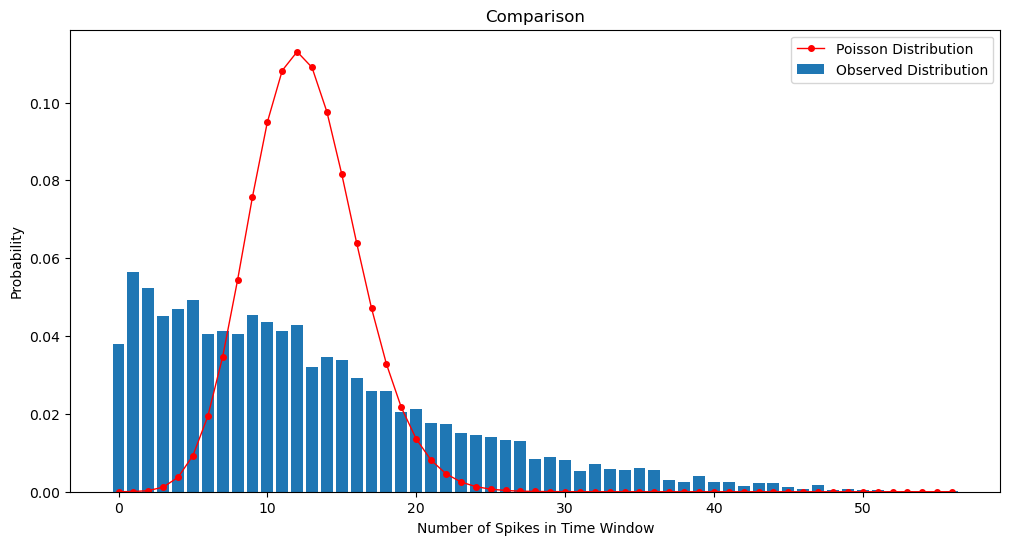

In [34]:
# Aim3: convert this histogram to a probability distribution, 
# and compare this distribution with the predicted Poisson distribution.

# Probability distribution
probability_distribution = count_histogram / np.sum(count_histogram)

# Calculate the mean firing rate (Lambda) within the chosen time window
nSpikes = np.sum(counts)  # Total number of spikes
Lambda = time_window * nSpikes / duration_secs

# Poisson distribution
p = np.zeros(max_count)
for k in range(0, max_count):
    p[k] = (Lambda**k) * np.exp(-Lambda) / np.math.factorial(k)

# Define x values from 0 to max_count - 1
x = np.arange(0, max_count)

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(x, probability_distribution, label='Observed Distribution')
plt.plot(x, p, color='red', marker='o', markersize=4, linewidth=1, label='Poisson Distribution')
plt.xlabel('Number of Spikes in Time Window')
plt.ylabel('Probability')
plt.title('Comparison')
plt.legend()
plt.show()
